## Mini Project 2

Import required libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ROMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load given datasets

In [3]:
df=pd.read_csv('Consumer_Complaints_train.csv')#train
df2=pd.read_csv('Consumer_Complaints_test.csv')#test


Print top 5 records of train dataset

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


Print top 5 records of test dataset

In [5]:
df2.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [6]:
print(df.shape)
print(df2.shape)

(358810, 18)
(119606, 17)


Print columns of train and test datasets

In [7]:
print(df.columns)
print(df2.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [8]:
print(df.dtypes)
print(df2.dtypes)

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company    

Print missing values in percentage

In [9]:
missing_percentage1 = (df.isnull().sum() / len(df)) * 100
missing_percentage2 = (df2.isnull().sum() / len(df2)) * 100
missing_data1 = pd.DataFrame({'Column':df.columns,
                            'Missing Percentage': missing_percentage1})
missing_data2 = pd.DataFrame({'Column':df2.columns,
                            'Missing Percentage': missing_percentage2})
print("Missing values in percentage:")
print(missing_data1)
print('**********************************************************************************')
print(missing_data2)

Missing values in percentage:
                                                    Column  Missing Percentage
Date received                                Date received            0.000000
Product                                            Product            0.000000
Sub-product                                    Sub-product           28.925058
Issue                                                Issue            0.000000
Sub-issue                                        Sub-issue           61.139322
Consumer complaint narrative  Consumer complaint narrative           84.342688
Company public response            Company public response           81.067696
Company                                            Company            0.000000
State                                                State            0.809063
ZIP code                                          ZIP code            0.811293
Tags                                                  Tags           86.002062
Consumer consent provi

Drop columns where more than 25% of the data are missing.

In [10]:
missing_percentage1 = (df.isnull().sum() / len(df)) * 100
missing_percentage2 = (df2.isnull().sum() / len(df2)) * 100
columns_to_drop1 = missing_data1[missing_percentage1 > 25].index
columns_to_drop2 = missing_data2[missing_percentage2 > 25].index
data_cleaned1 = df.drop(columns=columns_to_drop1)
data_cleaned2 = df2.drop(columns=columns_to_drop2)
print("Train Data:")
print(data_cleaned1)
print('**********************************************************************************')
print("Test Data:")
print(data_cleaned2)

Train Data:
       Date received                  Product  \
0         2015-10-14         Credit reporting   
1         2015-04-26  Bank account or service   
2         2013-12-20              Credit card   
3         2016-03-03          Debt collection   
4         2015-01-30          Debt collection   
...              ...                      ...   
358805    2014-04-14         Credit reporting   
358806    2013-03-14                 Mortgage   
358807    2013-02-01              Credit card   
358808    2015-06-25          Debt collection   
358809    2015-05-12         Credit reporting   

                                           Issue  \
0         Incorrect information on credit report   
1                       Deposits and withdrawals   
2                                          Other   
3                Disclosure verification of debt   
4                Disclosure verification of debt   
...                                          ...   
358805    Incorrect information on 

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [11]:
df['Date Received'] = pd.to_datetime(df['Date received'])
df['Year_Received'] = df['Date Received'].dt.year
df['Month_Received'] = df['Date Received'].dt.month
df['Day_Received'] = df['Date Received'].dt.day
df2['Date Received'] = pd.to_datetime(df2['Date received'])
df2['Year_Received'] = df2['Date Received'].dt.year
df2['Month_Received'] = df2['Date Received'].dt.month
df2['Day_Received'] = df2['Date Received'].dt.day

Convert dates from object type to datetime type

In [12]:
df['Date Received'] = pd.to_datetime(df['Date received'])
df2['Date Received'] = pd.to_datetime(df2['Date received'])

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [13]:
df['Date Received'] = pd.to_datetime(df['Date received'])
df['Date Sent to Company'] = pd.to_datetime(df['Date sent to company'])
df['Days Held'] = (df['Date Sent to Company'] - df['Date Received']).dt.days
df2['Date Received'] = pd.to_datetime(df2['Date received'])
df2['Date Sent to Company'] = pd.to_datetime(df2['Date sent to company'])
df2['Days Held'] = (df2['Date Sent to Company'] - df2['Date Received']).dt.days

Convert "Days Held" to Int(above column)

In [14]:
df['Days Held'] = df['Days Held'].astype(int)
df2['Days Held'] = df2['Days Held'].astype(int)


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [15]:
df=df.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"])
df2=df2.drop(columns=["Date received","Date sent to company","ZIP code", "Complaint ID"])


Impute null values in "State" by Mode 
(find mode and replace nan value)

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df)
imputed_data1 = imputer.transform(df.values)
imputer.fit(df2)
imputed_data2 = imputer.transform(df2.values)


D:\software\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
D:\software\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Check Missing Values in the dataset

In [17]:
df.isnull()
df2.isnull()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Date Received,Year_Received,Month_Received,Day_Received,Date Sent to Company,Days Held
0,False,True,False,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,False,True,False,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False
119602,False,True,False,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False
119603,False,False,False,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False
119604,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Categorize Days into Weeks with the help of 'Days Received'

In [18]:
# Define the bins for categorization (assuming 7 days in a week)
bins = [-1, 6, 13, 20, 27, 34, 41, 48, float("inf")]
labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8+']
df['Weeks Held'] = pd.cut(df['Days Held'], bins=bins, labels=labels)
df2['Weeks Held'] = pd.cut(df2['Days Held'], bins=bins, labels=labels)


Drop "Day_Received" column

In [19]:
df=df.drop(columns='Day_Received')
df2=df2.drop(columns='Day_Received')

Print head of train and test dataset and observe

In [20]:
print(df.head())
print(df2.head())

                   Product                            Sub-product  \
0         Credit reporting                                    NaN   
1  Bank account or service             Other bank product/service   
2              Credit card                                    NaN   
3          Debt collection  Other (i.e. phone, health club, etc.)   
4          Debt collection                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to verify debt   
4  Not given enough info to verify debt   

                        Consumer complaint narrative  \

Store data of the disputed consumer in the new data frame as "disputed_cons"

In [21]:
disputed_cons = df[df['Consumer disputed?'] == 'Yes'].copy()
disputed_cons


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Date Received,Year_Received,Month_Received,Date Sent to Company,Days Held,Weeks Held
1,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,NaN,Consent provided,Web,Closed with explanation,Yes,Yes,2015-04-26,2015,4,2015-04-26,0,Week 1
4,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,NaN,NaN,Web,Closed with explanation,Yes,Yes,2015-01-30,2015,1,2015-01-30,0,Week 1
5,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,NaN,NaN,Web,Closed with explanation,Yes,Yes,2014-01-10,2014,1,2014-01-15,5,Week 1
7,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,NaN,Consent not provided,Web,Closed with explanation,Yes,Yes,2015-12-07,2015,12,2015-12-07,0,Week 1
8,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,NaN,NaN,Web,Closed with relief,Yes,Yes,2012-04-05,2012,4,2012-04-05,0,Week 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Other mortgage,Credit decision / Underwriting,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN,NaN,Postal mail,Closed with explanation,Yes,Yes,2014-05-30,2014,5,2014-06-04,5,Week 1
358791,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,TX,NaN,NaN,Referral,Closed with explanation,Yes,Yes,2013-08-12,2013,8,2013-08-13,1,Week 1
358797,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"Convergent Resources, Inc.",IN,NaN,Consent not provided,Web,Closed with explanation,Yes,Yes,2016-06-20,2016,6,2016-06-20,0,Week 1
358798,Credit reporting,NaN,Incorrect information on credit report,Account terms,NaN,NaN,Equifax,IL,NaN,NaN,Web,Closed with non-monetary relief,Yes,Yes,2013-02-26,2013,2,2013-02-26,0,Week 1


Plot bar graph for the total no of disputes with the help of seaborn

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


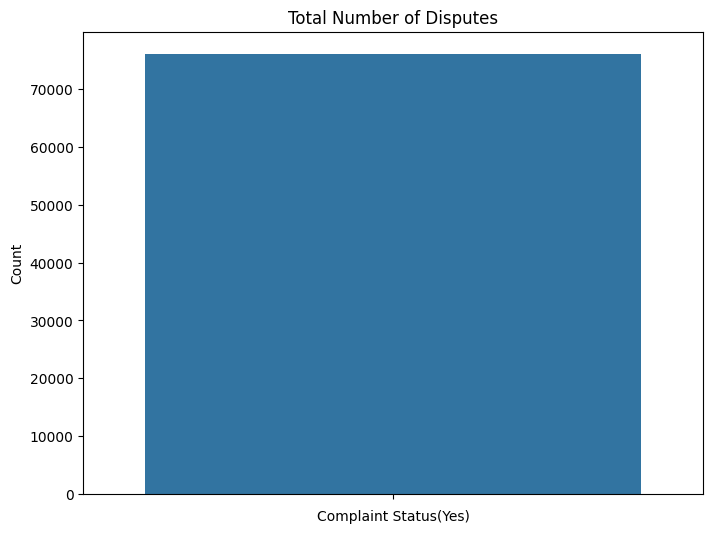

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(y=disputed_cons.index, data=disputed_cons, estimator=len)
plt.title('Total Number of Disputes')
plt.xlabel('Complaint Status(Yes)')
plt.ylabel('Count')
plt.show()


Plot bar graph for the total no of disputes products-wise with help of seaborn

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


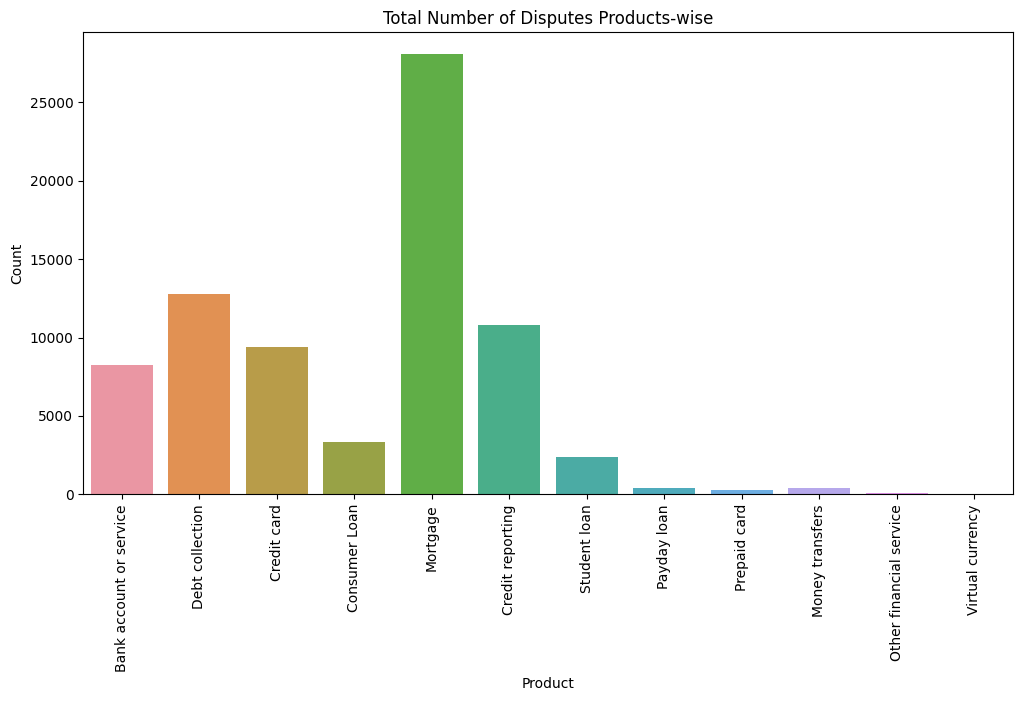

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=disputed_cons, x='Product')
plt.title('Total Number of Disputes Products-wise')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


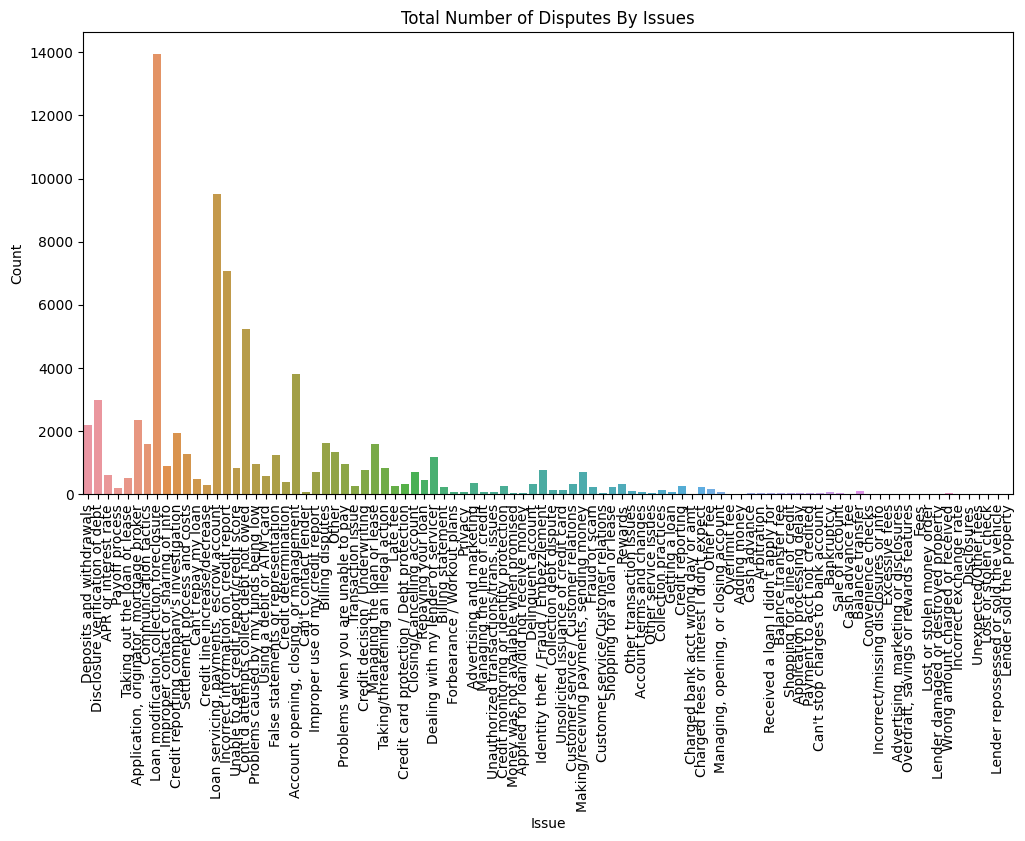

In [24]:
top_issues = disputed_cons['Issue'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=disputed_cons, x='Issue')
plt.title('Total Number of Disputes By Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Plot bar graph for the total no of disputes by State with Maximum Disputes

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


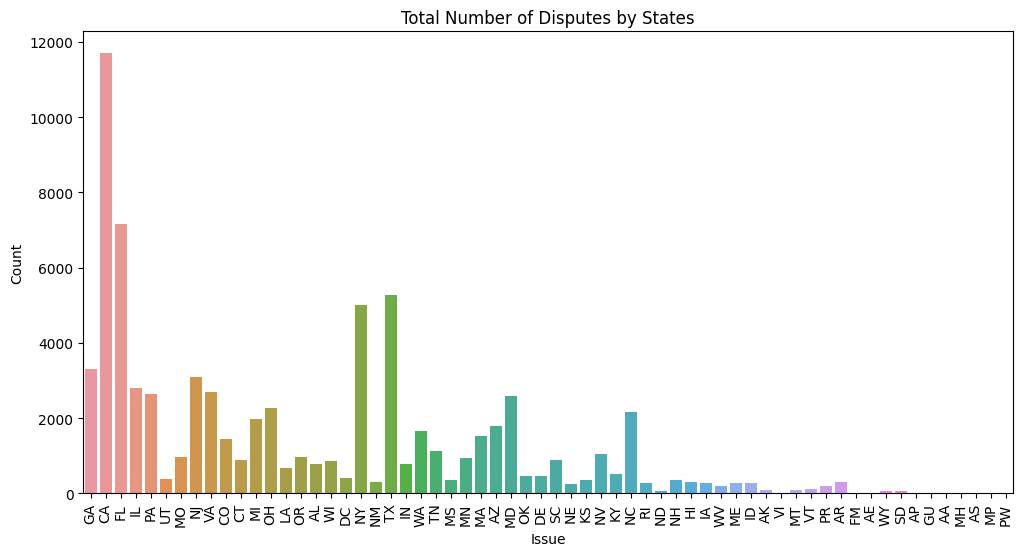

In [25]:
top_issues = disputed_cons['State'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=disputed_cons, x='State')
plt.title('Total Number of Disputes by States')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Plot bar graph for the total no of disputes by Submitted Via diffrent source 

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


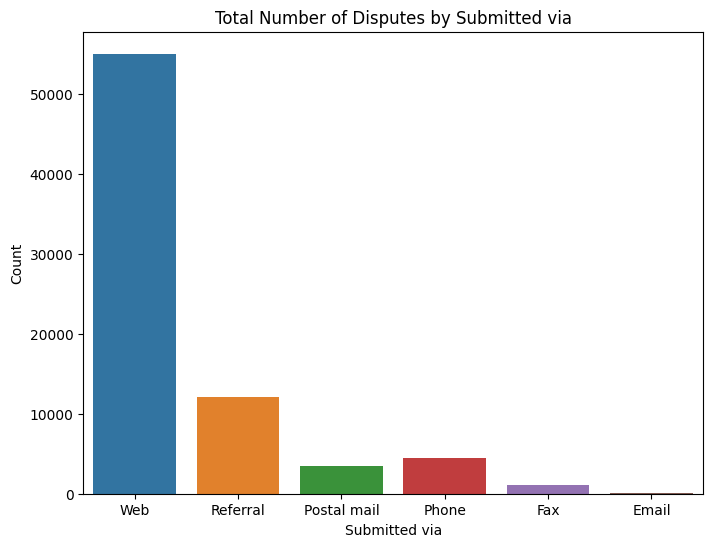

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x='Submitted via')
plt.title('Total Number of Disputes by Submitted via')
plt.xlabel('Submitted via')
plt.ylabel('Count')
plt.show()


Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


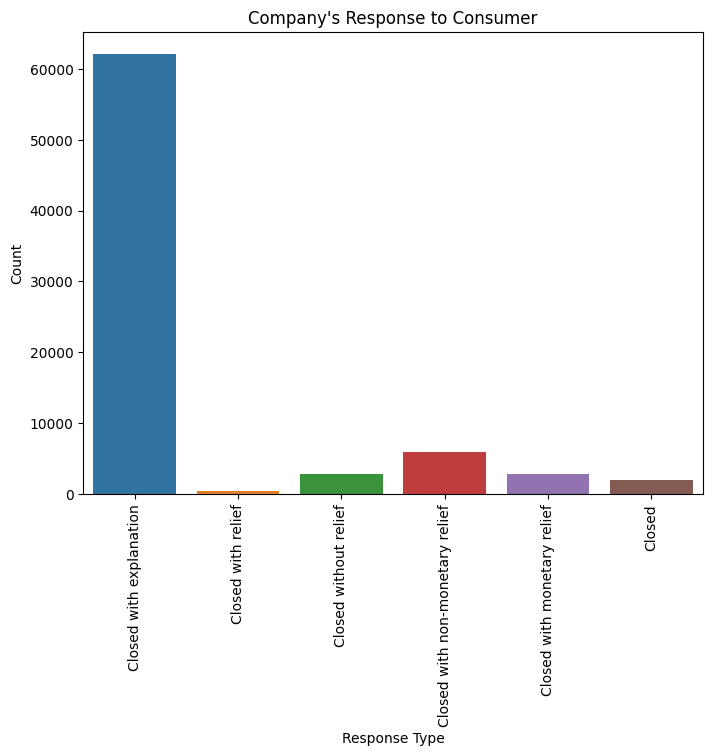

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x='Company response to consumer')
plt.title("Company's Response to Consumer")
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


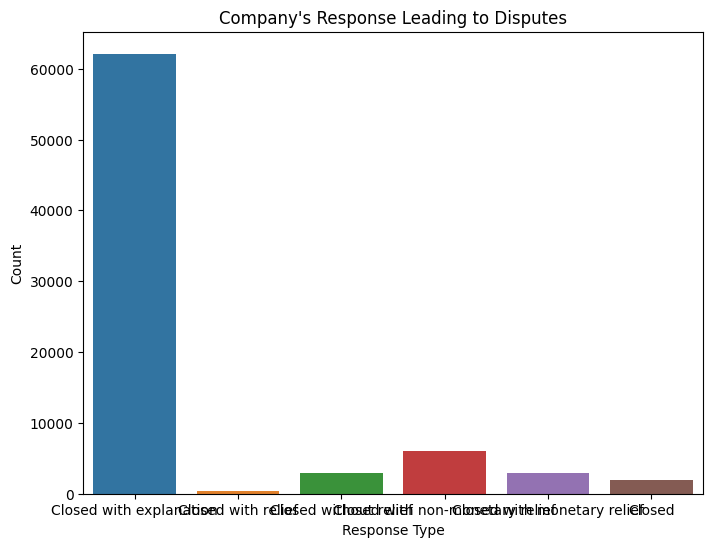

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x='Company response to consumer')
plt.title("Company's Response Leading to Disputes")
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.show()


Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


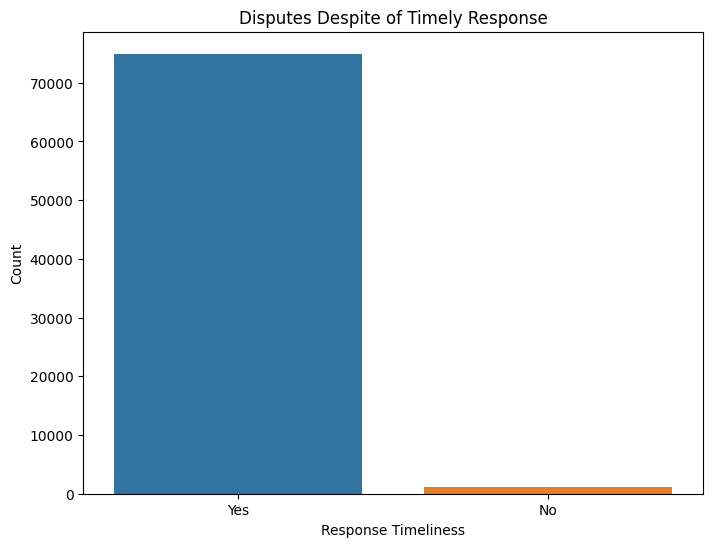

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x='Timely response?')
plt.title('Disputes Despite of Timely Response')
plt.xlabel('Response Timeliness')
plt.ylabel('Count')
plt.show()


Plot bar graph for the total no of disputes over Year Wise Complaints

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


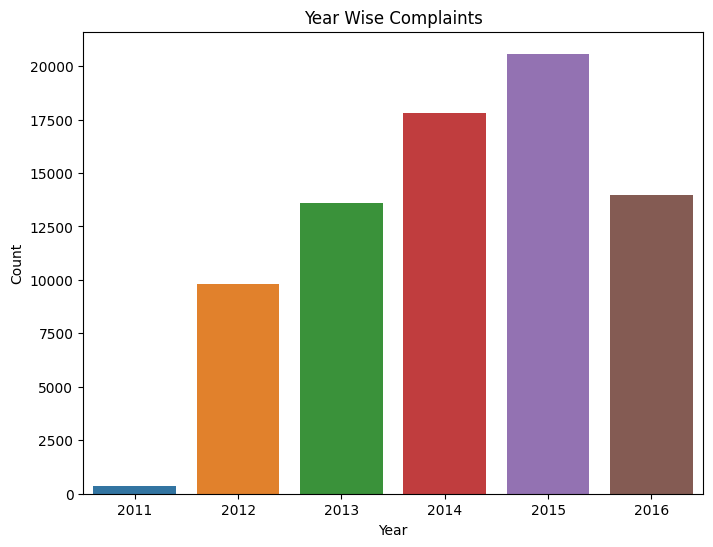

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x=disputed_cons['Date Received'].dt.year)
plt.title('Year Wise Complaints')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Plot bar graph for the total no of disputes over Year Wise Disputes

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


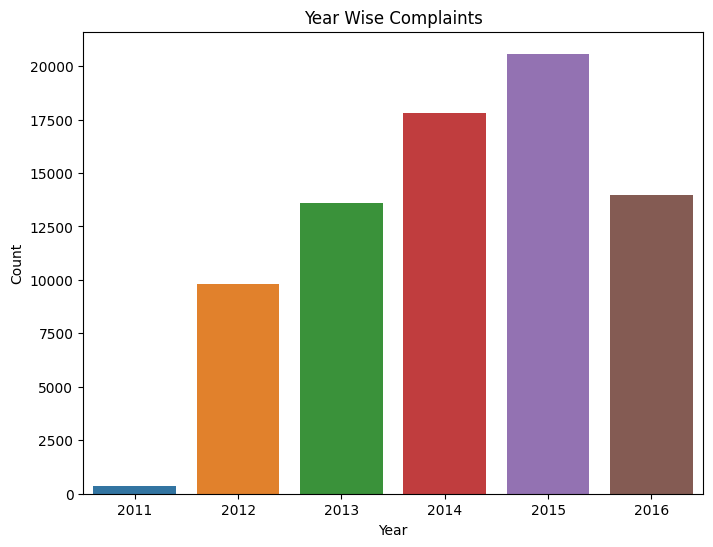

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=disputed_cons, x=disputed_cons['Date Received'].dt.year)
plt.title('Year Wise Complaints')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Plot  bar graph for the top companies with highest complaints

D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\software\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


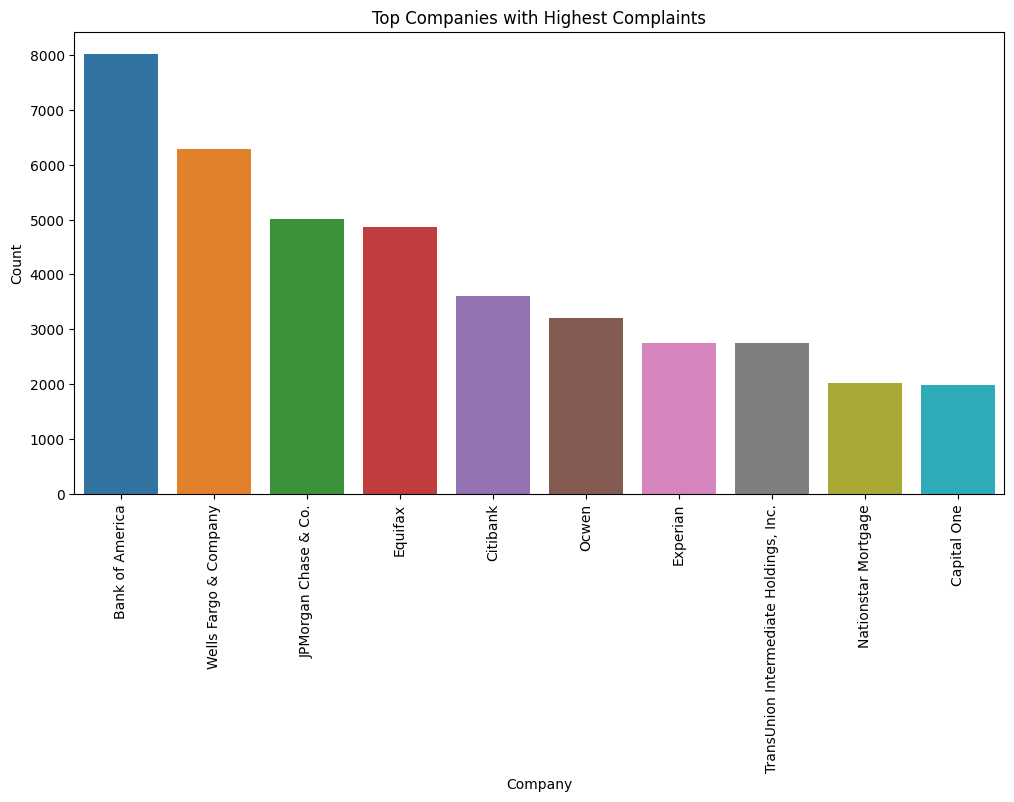

In [32]:
top_companies = disputed_cons['Company'].value_counts().head(10)#taking first 10 rows
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top Companies with Highest Complaints')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


"Days Held" Column Analysis(describe)

In [33]:
print(disputed_cons['Days Held'].describe())
print(df['Days Held'].describe())
print(df2['Days Held'].describe())

count    76172.000000
mean         3.638962
std         14.254591
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        631.000000
Name: Days Held, dtype: float64
count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days Held, dtype: float64
count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days Held, dtype: float64


Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [34]:
disputed_cons['Days Held'] = disputed_cons['Days Held'].apply(lambda x: max(x, 0))


Drop Days Held with Negative Values

In [35]:
disputed_cons = disputed_cons[disputed_cons['Days Held'] >= 0]


Text pre-processing
(It will be cover in upcoming calsses)

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
relevant_text_train = df['Issue']
relevant_text_test = df2['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: word_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: word_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in no_punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [37]:
df['Issues_cleaned'] = clean_data_train
df2['Issues_cleaned'] = clean_data_test
df = df.drop('Issue', axis = 1)
df2 = df2.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [38]:
df=df.drop(columns=['Company', 'State', 'Year_Received','Days Held'])
df2=df2.drop(columns=['Company', 'State', 'Year_Received','Days Held'])


Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [39]:
df['Consumer disputed?']=df['Consumer disputed?'].apply(lambda x: 1 if x == 'Yes' else 0)

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [40]:
categorical_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
dummy_vars = pd.get_dummies(df[categorical_cols])
df = pd.concat([df, dummy_vars], axis=1)
df.drop(columns=categorical_cols, inplace=True)
dummy_vars1 = pd.get_dummies(df2[categorical_cols])
df2 = pd.concat([df2, dummy_vars], axis=1)
df2.drop(columns=categorical_cols, inplace=True)

Concate Dummy Variables and Drop the Original Columns

Calculating TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df['Issues_cleaned'].values.astype('U')).toarray()
issues_cleaned_test = tf.fit_transform(df2['Issues_cleaned'].values.astype('U')).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,13.097404
destroy,12.691939
damag,12.691939
overdraft,12.404257
featur,12.404257


Replacing Issues_cleaned by Vectorized Issues

In [42]:
df = df.drop('Issues_cleaned', axis = 1)
df2 = df2.drop('Issues_cleaned', axis = 1)
df = pd.concat([df, issues_train], axis = 1)
df2 = pd.concat([df2, issues_test], axis = 1)
Feature168 = [0] * 358810
df2['Feature168'] = Feature168

observe train and test datasets

In [43]:
df.head()
df2.head()

,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,Tags,Consumer consent provided?,Date Received,Month_Received,Date Sent to Company,Weeks Held,...,Feature164,Feature165,Feature166,Feature167,Feature168,Feature169,Feature170,Feature171,Feature172,Feature173
0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-17,1.0,2015-01-17,Week 1,...,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0
1,Title loan,NaN,NaN,Company believes it acted appropriately as aut...,Servicemember,NaN,2016-06-22,6.0,2016-06-22,Week 1,...,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0
2,NaN,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,NaN,Consent provided,2015-09-04,9.0,2015-09-04,Week 1,...,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0
3,Installment loan,NaN,I have asked One Main Financial not to call my...,NaN,NaN,Consent provided,2016-05-17,5.0,2016-05-20,Week 1,...,0.0,0.0,0.0,0.401654,0,0.0,0.0,0.0,0.407169,0.0
4,"Other (i.e. phone, health club, etc.)",Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,NaN,Consent provided,2016-07-07,7.0,2016-07-07,Week 1,...,0.0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0


Observe Shape of new Train and Test Datasets

In [44]:
print(df.shape)
print(df2.shape)

(358810, 210)
(358810, 209)


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [48]:
labelencoder=LabelEncoder()
X=X.apply(labelencoder.fit_transform)
scaler=preprocessing.StandardScaler()
scaled1=scaler.fit_transform(X)

Do feature selection with help of PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80)  
X_train_pca = pca.fit_transform(scaled1)

Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [46]:
X = df.drop(columns=['Consumer disputed?'])
Y = df['Consumer disputed?']

Split data into Train and Test datasets
(for test data use test excel file data)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_pca,Y, test_size=0.2, random_state=42)

# Use a test Excel file for the test data
X_test = pd.read_excel('Consumer_Complaints_test.xlsx')

Shapes of the datasets

In [60]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((287048, 58), (71762, 58), (287048,), (71762,), (119606, 17))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np


# Ensure target arrays are 1D
#y_train = np.ravel(y_train)
#y_val = np.ravel(y_val)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_val, test_pred)
    results[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}

# Print the results
print("Model\t\t\tTrain Accuracy\tTest Accuracy")
for name, result in results.items():
    print(f"{name: <20}\t{result['Train Accuracy']:.4f}\t\t{result['Test Accuracy']:.4f}")


D:\software\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model			Train Accuracy	Test Accuracy
Logistic Regression 	0.7877		0.7876
Decision Tree       	0.9645		0.6984
Random Forest       	0.9644		0.7332
AdaBoost            	0.7877		0.7876
Gradient Boosting   	0.7880		0.7878
K-Neighbors         	0.8156		0.7563
XGBoost             	0.7921		0.7896


Final Model and Prediction for test data file

In [73]:
# Select the best-performing model
best_model_name = max(results, key=lambda k: results[k]["Test Accuracy"])
best_model = models[best_model_name]

# Train the best model on the entire training data
best_model.fit(X_train_pca, Y)
# Make predictions on the test data
test_predictions = best_model.predict(pd.DataFrame(X_test).iloc[:,16])



Export Predictions to CSV

In [74]:
test_predictions_df = pd.DataFrame(test_predictions, columns=["Predicted Labels"])
test_predictions_df.to_csv("test_predictions.csv", index=False)
